In [9]:
from sklearn.cluster import DBSCAN
import pandas as pd 
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
import seaborn as sns
import matplotlib.pyplot as plt


In [17]:
data=pd.read_csv('crime_data.csv')
data.head()

,city,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   city      50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [19]:
data.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [23]:
data1=data.drop(['city'],axis=1)
data1.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [25]:
scale=MinMaxScaler()
data2=pd.DataFrame(scale.fit_transform(data1))
data2.head()

,0,1,2,3
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


In [66]:
dbscan=DBSCAN(eps=0.308,min_samples=5).fit(data2)

In [67]:
dbscan.labels_

array([ 0, -1,  1,  2, -1, -1,  2, -1, -1,  0,  2,  2,  1,  2,  2,  2,  2,
        0,  2,  1,  2, -1,  2, -1,  2,  2,  2, -1,  2,  2,  1,  1, -1,  2,
        2,  2,  2,  2,  2,  0,  2,  0,  2,  2,  2,  2,  2,  2,  2,  2],
      dtype=int64)

In [70]:
data['cluster']=dbscan.labels_
data.head()

,city,Murder,Assault,UrbanPop,Rape,cluster
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,-1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,2
4,California,9.0,276,91,40.6,-1


<AxesSubplot:xlabel='Murder', ylabel='Rape'>

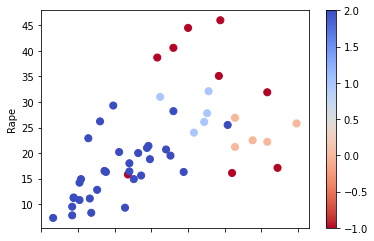

In [72]:
data.plot(x='Murder',y='Rape',c=dbscan.labels_,s=50,kind="scatter",cmap=plt.cm.coolwarm_r)

In [73]:
silhouette_score(data2,dbscan.labels_)

0.2287158308162511